In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset from GitHub URL
url = "https://raw.githubusercontent.com/AnudipAE/DANLC/master/sales-data.csv"
df = pd.read_csv(url)


In [3]:
# Display basic info
display(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Account   17 non-null     int64 
 1   Name      17 non-null     object
 2   Rep       17 non-null     object
 3   Manager   17 non-null     object
 4   Product   17 non-null     object
 5   Quantity  17 non-null     int64 
 6   Price     17 non-null     int64 
 7   Status    17 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.2+ KB


None

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [4]:
# Summary statistics
display(df.describe(include='all'))


,Account,Name,Rep,Manager,Product,Quantity,Price,Status
count,17.000000,17,17,17,17,17.000000,17.000000,17
unique,NaN,12,5,2,4,NaN,NaN,4
top,NaN,Trantow-Barrows,Craig Booker,Debra Henley,CPU,NaN,NaN,presented
freq,NaN,3,4,9,9,NaN,NaN,6
mean,462254.235294,NaN,NaN,NaN,NaN,1.764706,30705.882353,NaN
std,259093.442862,NaN,NaN,NaN,NaN,1.032558,28444.605609,NaN
min,141962.000000,NaN,NaN,NaN,NaN,1.000000,5000.000000,NaN
25%,218895.000000,NaN,NaN,NaN,NaN,1.000000,7000.000000,NaN
50%,412290.000000,NaN,NaN,NaN,NaN,2.000000,30000.000000,NaN
75%,714466.000000,NaN,NaN,NaN,NaN,2.000000,40000.000000,NaN


In [5]:
# Total Revenue per Product
df['Total Revenue'] = df['Quantity'] * df['Price']
revenue_per_product = df.groupby('Product', as_index=False)['Total Revenue'].sum()


In [6]:
# Sales count per status
status_counts = df['Status'].value_counts()

In [7]:
# Sales performance by Representative
sales_by_rep = df.groupby('Rep', as_index=False)['Total Revenue'].sum()


C:\Users\LAVANYA\AppData\Local\Temp\ipykernel_8172\683779012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Total Revenue', data=revenue_per_product, palette='viridis')


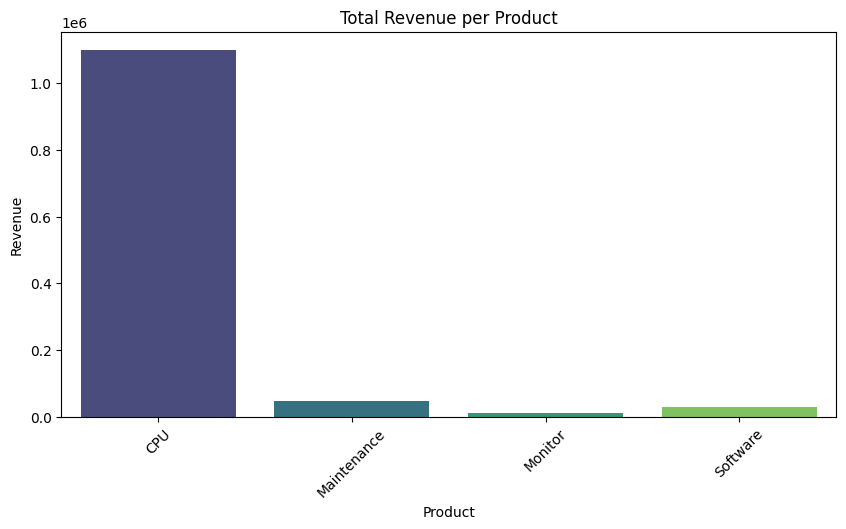

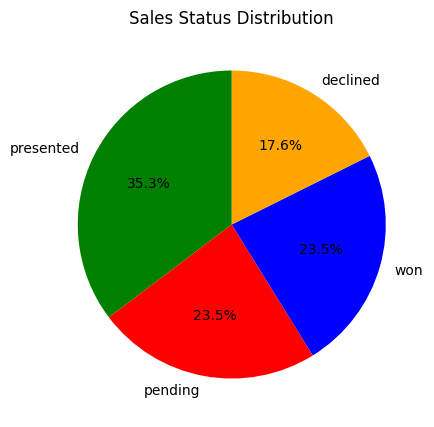

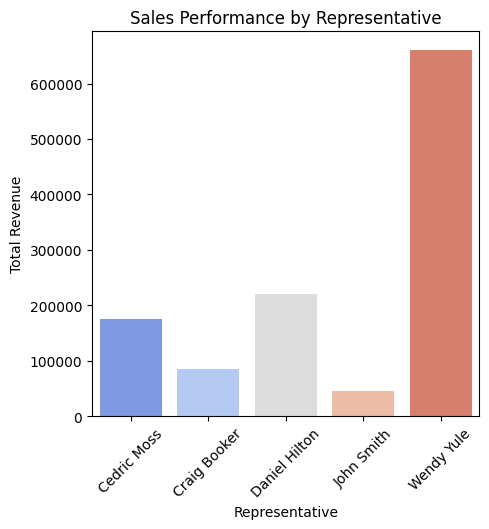

In [9]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Product', y='Total Revenue', data=revenue_per_product, palette='viridis')
plt.title('Total Revenue per Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue', 'orange'])
plt.title('Sales Status Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(5, 5))
sns.barplot(x='Rep', y='Total Revenue', hue='Rep', data=sales_by_rep, palette='coolwarm', legend=False)
plt.title('Sales Performance by Representative')
plt.xlabel('Representative')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Save final processed dataset
df.to_csv("processed_sales_data.csv", index=False)